In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
# import cufflinks as cf
from plotly.offline import iplot
import seaborn as sns 
py.offline.init_notebook_mode(connected=True)
# cf.go_offline()

In [3]:
df = pd.read_excel('D:/Users/arnav_mathur\Downloads\AM\Capstone/Data Science Onboarding Capstone Project Raw_Data.xlsx')

# DATA UNDERSTANDING

In [4]:
df.describe()

,AIN,RollYear,TaxRateArea,totBuildingDataLines,YearBuilt,EffectiveYearBuilt,SQFTmain,Bedrooms,Bathrooms,Units,...,TotalValue,TotalExemption,netTaxableValue,AdministrativeRegion,Cluster,HouseNo,ZIPcode5,rowID,CENTER_LAT,CENTER_LON
count,1.000000e+04,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,9999.000000,1.000000e+04,10000.000000,10000.000000
mean,4.095744e+09,2019.0,678.847400,1.076100,1934.358500,1939.473700,2405.304400,3.848400,3.015400,1.946300,...,6.289843e+05,5.737523e+03,6.232468e+05,6.239300,6481.660100,6918.100400,90621.415742,2.019410e+13,34.096204,-118.386369
std,1.582243e+09,0.0,2269.346132,0.336928,189.166959,197.372654,7059.139913,5.665865,5.669619,7.369318,...,2.040089e+06,1.026492e+05,2.029801e+06,4.052836,4076.217257,6082.975637,643.967297,1.582243e+09,0.123129,0.118514
min,2.004002e+09,2019.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2102.000000,0.000000,90001.000000,2.019200e+13,33.708126,-118.667832
25%,2.502028e+09,2019.0,13.000000,1.000000,1930.000000,1943.000000,1208.000000,2.000000,2.000000,1.000000,...,2.086160e+05,0.000000e+00,2.044405e+05,3.000000,3127.000000,1642.000000,90036.000000,2.019250e+13,34.017749,-118.465366
50%,4.302031e+09,2019.0,16.000000,1.000000,1952.000000,1958.000000,1596.000000,3.000000,2.000000,1.000000,...,3.773065e+05,0.000000e+00,3.731155e+05,4.000000,4428.000000,5227.500000,90077.000000,2.019430e+13,34.094632,-118.382473
75%,5.424272e+09,2019.0,67.000000,1.000000,1968.000000,1975.000000,2278.250000,4.000000,3.000000,1.000000,...,6.441738e+05,7.000000e+03,6.403778e+05,9.000000,9184.000000,10658.500000,91335.000000,2.019542e+13,34.195889,-118.293634
max,7.563036e+09,2019.0,15938.000000,5.000000,2019.000000,2019.000000,347064.000000,198.000000,198.000000,366.000000,...,1.106204e+08,6.370382e+06,1.106204e+08,30.000000,28405.000000,28006.000000,91607.000000,2.019756e+13,34.329560,-118.127673


In [5]:
df.shape

(10000, 51)

In [6]:
df.dtypes

ZIPcode                         object
TaxRateArea_CITY                object
AIN                              int64
RollYear                         int64
TaxRateArea                      int64
AssessorID                      object
PropertyLocation                object
PropertyType                    object
PropertyUseCode                 object
GeneralUseType                  object
SpecificUseType                 object
SpecificUseDetail1              object
SpecificUseDetail2              object
totBuildingDataLines             int64
YearBuilt                        int64
EffectiveYearBuilt               int64
SQFTmain                         int64
Bedrooms                         int64
Bathrooms                        int64
Units                            int64
RecordingDate                    int64
LandValue                        int64
LandBaseYear                     int64
ImprovementValue                 int64
ImpBaseYear                      int64
TotalLandImpValue        

### It is visible that there are 2 columns for ZIP code, one of them is of object dtype.

In [7]:
df.isnull().sum()

ZIPcode                           1
TaxRateArea_CITY                  0
AIN                               0
RollYear                          0
TaxRateArea                       0
AssessorID                        0
PropertyLocation                  0
PropertyType                      0
PropertyUseCode                   0
GeneralUseType                    0
SpecificUseType                   0
SpecificUseDetail1             8164
SpecificUseDetail2             6738
totBuildingDataLines              0
YearBuilt                         0
EffectiveYearBuilt                0
SQFTmain                          0
Bedrooms                          0
Bathrooms                         0
Units                             0
RecordingDate                     0
LandValue                         0
LandBaseYear                      0
ImprovementValue                  0
ImpBaseYear                       0
TotalLandImpValue                 0
HomeownersExemption               0
RealEstateExemption         

#### Columns with a lot of null values can be deleted. SpecificUseDetail will be retained as these columns could be price drivers

In [8]:
df.nunique()

ZIPcode                         9412
TaxRateArea_CITY                   5
AIN                            10000
RollYear                           1
TaxRateArea                      147
AssessorID                     10000
PropertyLocation                9999
PropertyType                       5
PropertyUseCode                   49
GeneralUseType                     1
SpecificUseType                    8
SpecificUseDetail1                 6
SpecificUseDetail2                14
totBuildingDataLines               6
YearBuilt                        131
EffectiveYearBuilt               124
SQFTmain                        3307
Bedrooms                          66
Bathrooms                         67
Units                             63
RecordingDate                   4877
LandValue                       8062
LandBaseYear                      46
ImprovementValue                8490
ImpBaseYear                       46
TotalLandImpValue               9194
HomeownersExemption                7
R

<AxesSubplot:>

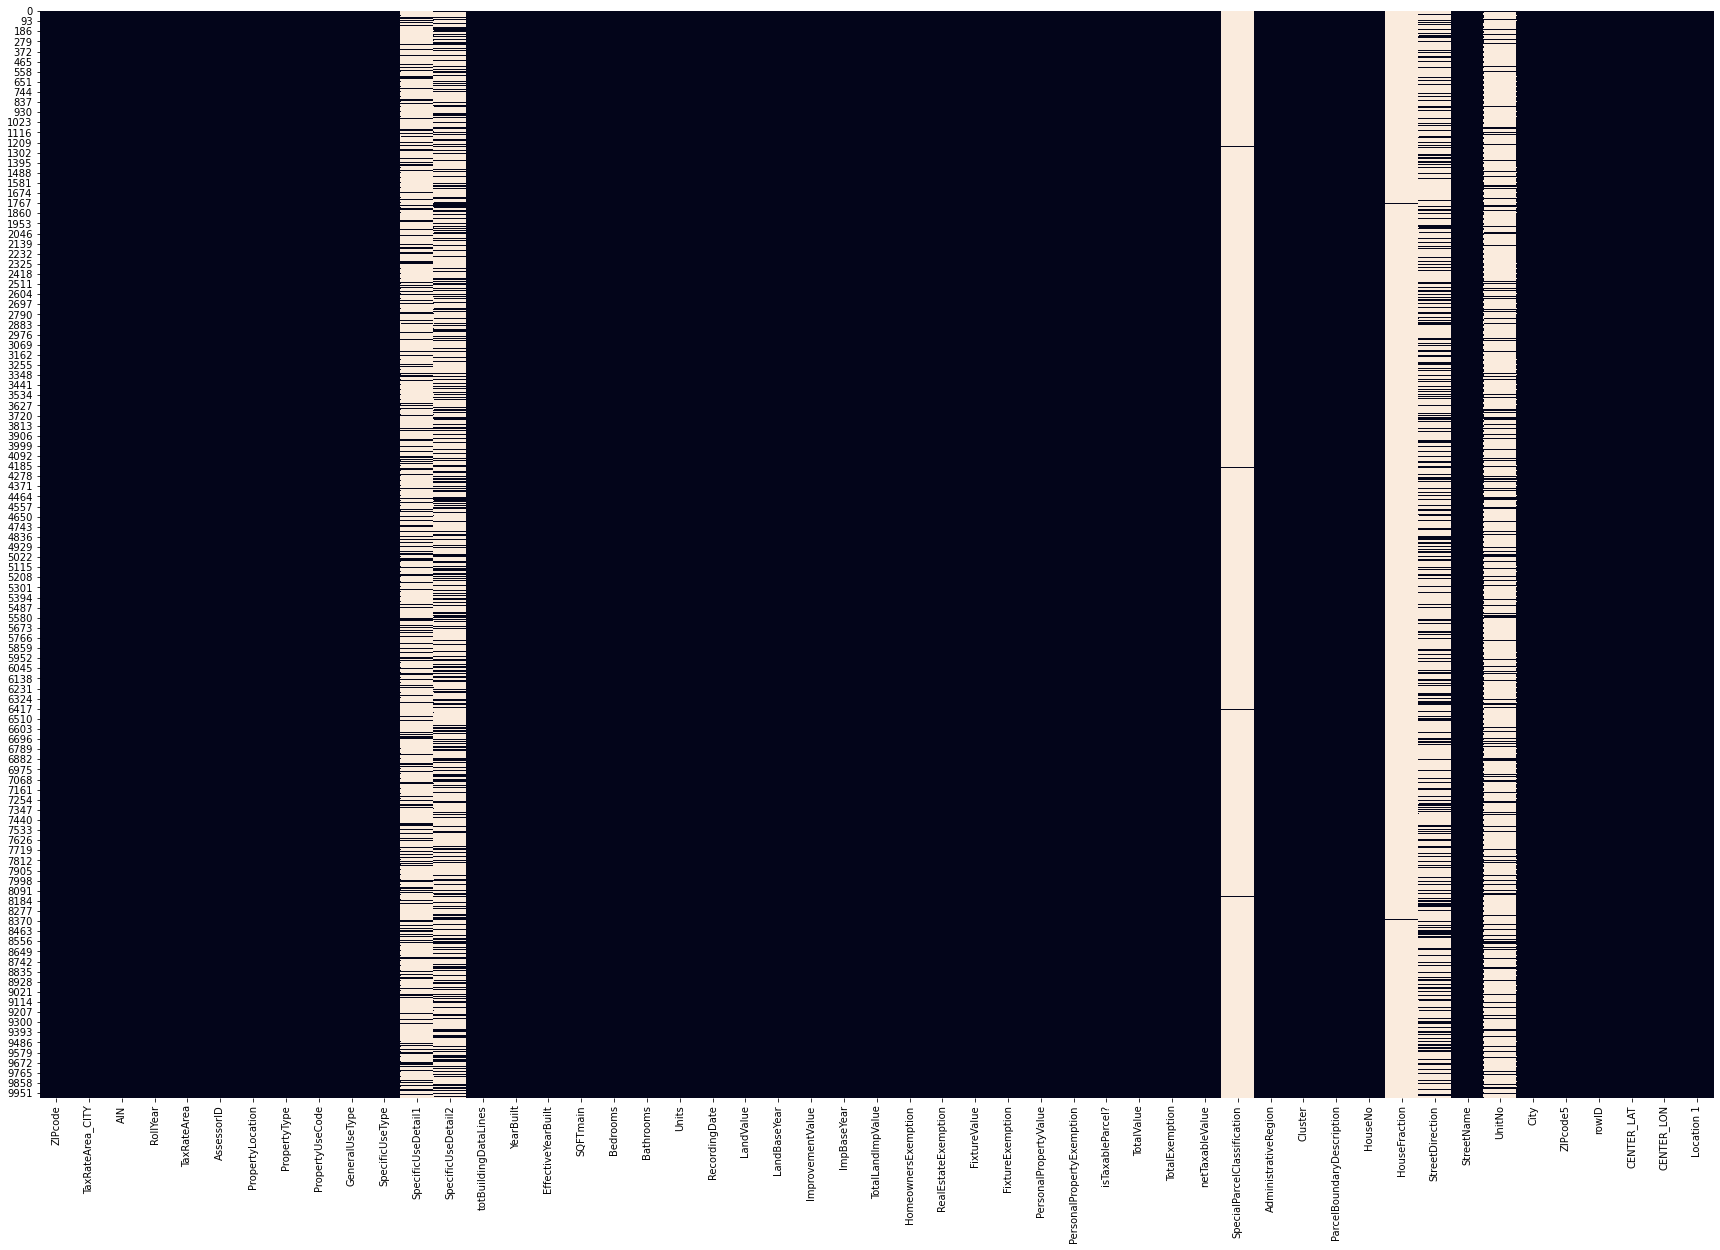

In [9]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(df.isnull(), cbar=False,annot_kws={'size': 100})

#### RollYear, City, SpecialParcelClassification and GeneralUseType have 1 value so they will not help in predictions.

In [10]:
#deleting columns using above two inferences
df = df.drop(['ZIPcode','HouseFraction','StreetDirection','UnitNo','RollYear', 'City', 'SpecialParcelClassification', 'GeneralUseType' ], axis=1)

## Distribution of Data in basic drivers like Size, number of rooms

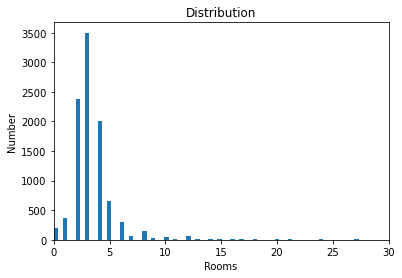

In [11]:
fig=plt.figure()

ax = fig.add_subplot(1,1,1)
ax.hist(df['Bedrooms'],bins = 500)

plt.title('Distribution')
plt.xlabel('Rooms')
plt.ylabel('Number')
plt.xlim(0,30)
plt.show()

#### Most of the properties have less than 5 rooms

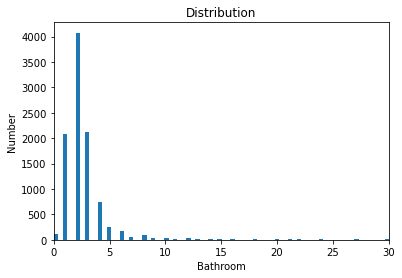

In [12]:
fig=plt.figure()

ax = fig.add_subplot(1,1,1)
ax.hist(df['Bathrooms'],bins = 500)

plt.title('Distribution')
plt.xlabel('Bathroom')
plt.ylabel('Number')
plt.xlim(0,30)
plt.show()

#### Most of the properties have less than 5 baths

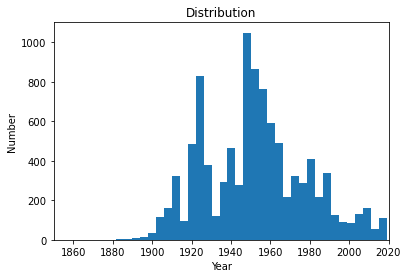

In [13]:
fig=plt.figure()

ax = fig.add_subplot(1,1,1)
ax.hist(df['YearBuilt'],bins = 500)

plt.title('Distribution')
plt.xlabel('Year')
plt.ylabel('Number')
plt.xlim(1850,2020)
plt.show()

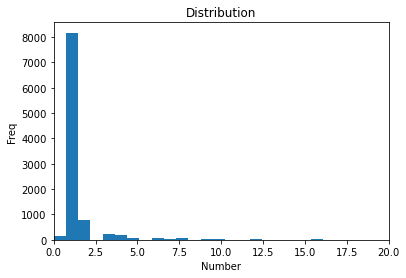

In [14]:
fig=plt.figure()

ax = fig.add_subplot(1,1,1)
ax.hist(df['Units'],bins = 500)

plt.title('Distribution')
plt.xlabel('Number')
plt.ylabel('Freq')
plt.xlim(0,20)
plt.show()

#### Most properties have less than 3 units

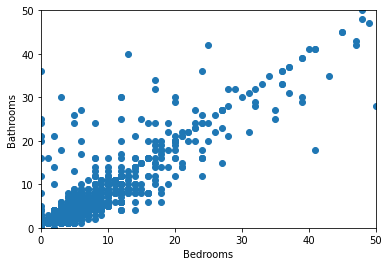

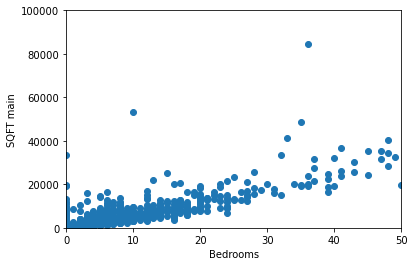

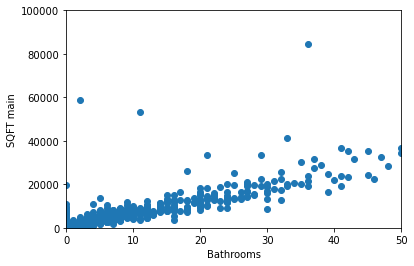

In [15]:
fig=plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(df['Bedrooms'],df['Bathrooms'])
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.xlim(0,50)
plt.ylim(0,50)

fig=plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.scatter(df['Bedrooms'],df['SQFTmain'])
plt.xlabel('Bedrooms')
plt.ylabel('SQFT main')
plt.xlim(0,50)
plt.ylim(0,100000)

fig=plt.figure()
ax3 = fig.add_subplot(1,1,1)
ax3.scatter(df['Bathrooms'],df['SQFTmain'])
plt.xlabel('Bathrooms')
plt.ylabel('SQFT main')
plt.xlim(0,50)
plt.ylim(0,100000)

# ax4 = fig.add_subplot(1,1,1)
# ax4.scatter(df['HouseFraction'],df['SQFTmain'])
# plt.xlabel('House Fraction')
# plt.ylabel('SQFT main')
# plt.xlim(0,50)
# plt.ylim(0,50)

plt.show()

#### Multiple outlier points can be seen in the scatter plots which will hurt the accuracy of the model. These need to be removed.

In [16]:
# sns.pairplot(df)

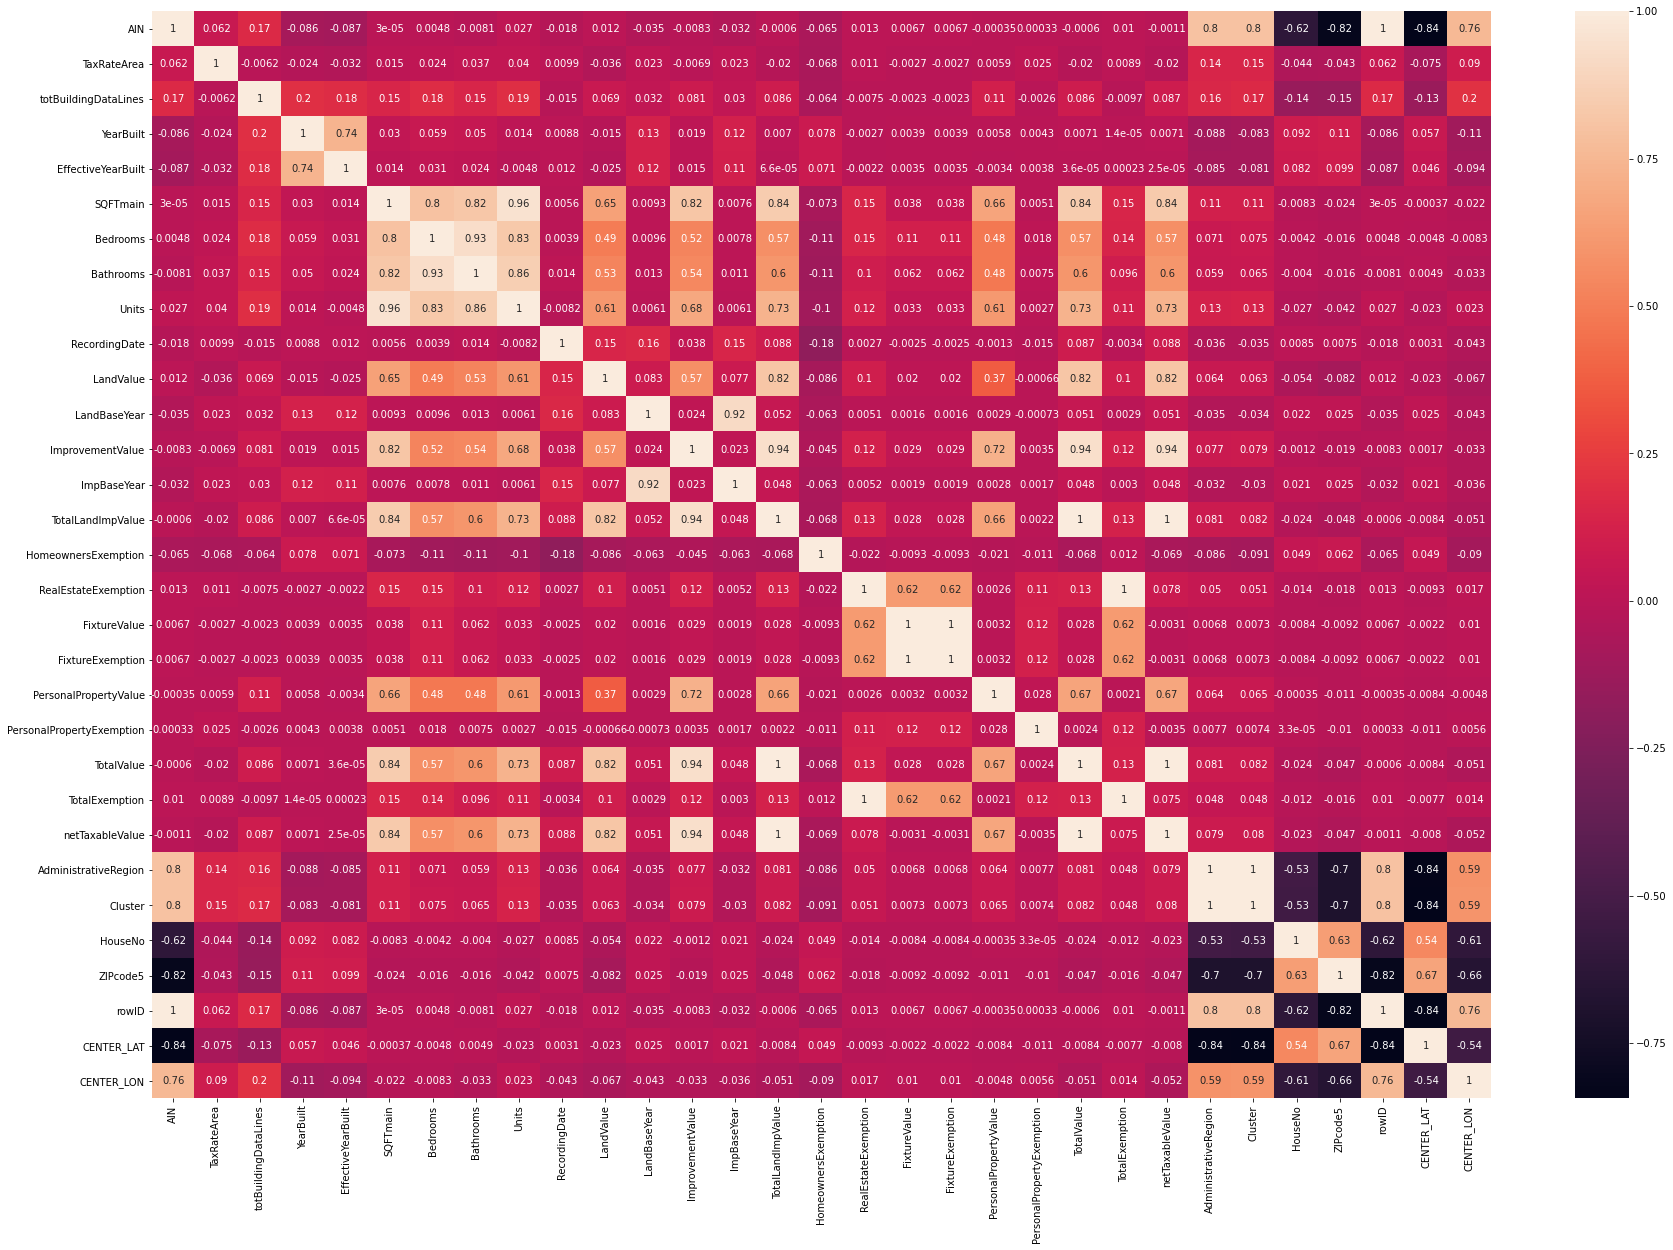

In [17]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corrMatrix,cbar=True, annot=True)
plt.show()

In [18]:
df = df[df.ZIPcode5.notnull()]

In [19]:
df.isnull().sum()

TaxRateArea_CITY                0
AIN                             0
TaxRateArea                     0
AssessorID                      0
PropertyLocation                0
PropertyType                    0
PropertyUseCode                 0
SpecificUseType                 0
SpecificUseDetail1           8163
SpecificUseDetail2           6738
totBuildingDataLines            0
YearBuilt                       0
EffectiveYearBuilt              0
SQFTmain                        0
Bedrooms                        0
Bathrooms                       0
Units                           0
RecordingDate                   0
LandValue                       0
LandBaseYear                    0
ImprovementValue                0
ImpBaseYear                     0
TotalLandImpValue               0
HomeownersExemption             0
RealEstateExemption             0
FixtureValue                    0
FixtureExemption                0
PersonalPropertyValue           0
PersonalPropertyExemption       0
isTaxableParce

# Feature Engineering

#### Now remove the features that are not to be used for training the model

In [20]:
df_fe = df.drop(['LandValue','LandBaseYear','ImprovementValue','ImpBaseYear','TotalLandImpValue','HomeownersExemption','RealEstateExemption','FixtureValue','FixtureExemption','PersonalPropertyValue','PersonalPropertyExemption','TotalExemption','netTaxableValue'],axis=1)

#### Attempt to remove outliers based on discrepancies in Bedroom, Bathroom and SQFTmain feature

In [21]:
df_fe.Bedrooms.quantile(0.99)

21.0

In [22]:
df_fe[df_fe.Bedrooms<1].describe()

,AIN,TaxRateArea,totBuildingDataLines,YearBuilt,EffectiveYearBuilt,SQFTmain,Bedrooms,Bathrooms,Units,RecordingDate,TotalValue,AdministrativeRegion,Cluster,HouseNo,ZIPcode5,rowID,CENTER_LAT,CENTER_LON
count,1.960000e+02,196.000000,196.000000,196.000000,196.000000,196.000000,196.0,196.000000,196.000000,1.960000e+02,1.960000e+02,196.000000,196.000000,196.000000,196.000000,1.960000e+02,196.000000,196.000000
mean,4.999593e+09,2722.153061,0.693878,1191.959184,1242.653061,3110.688776,0.0,1.336735,3.346939,2.008661e+07,1.062613e+06,9.602041,9848.938776,3293.770408,90182.030612,2.019500e+13,34.051743,-118.309671
std,1.019911e+09,5178.665210,0.588926,951.355518,949.669309,14446.909085,0.0,4.323920,11.769236,9.736820e+04,4.426191e+06,5.815523,5714.828749,4060.215492,393.427841,1.019911e+09,0.089387,0.088444
min,2.039022e+09,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.971081e+07,0.000000e+00,2.000000,2114.000000,108.000000,90001.000000,2.019204e+13,33.714006,-118.620198
25%,4.858004e+09,16.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.004112e+07,9.410875e+04,7.000000,7187.000000,645.000000,90014.750000,2.019486e+13,34.041191,-118.370472
50%,5.149006e+09,67.000000,1.000000,1920.000000,1927.500000,639.000000,0.0,0.000000,0.000000,2.012567e+07,2.571250e+05,9.000000,9296.000000,1557.500000,90032.000000,2.019515e+13,34.050784,-118.283002
75%,5.474504e+09,1028.000000,1.000000,1951.000000,1979.250000,1317.500000,0.0,1.000000,1.000000,2.015349e+07,5.370952e+05,9.000000,9591.000000,4774.750000,90064.250000,2.019547e+13,34.093720,-118.245027
max,7.467002e+09,15117.000000,4.000000,2009.000000,2011.000000,161173.000000,0.0,36.000000,118.000000,2.018112e+07,4.926087e+07,30.000000,27636.000000,22633.000000,91607.000000,2.019747e+13,34.301043,-118.161096


In [23]:
df_fe.Bathrooms.quantile(0.99)

23.0

In [24]:
df_fe[df_fe.Bathrooms<1].describe()

,AIN,TaxRateArea,totBuildingDataLines,YearBuilt,EffectiveYearBuilt,SQFTmain,Bedrooms,Bathrooms,Units,RecordingDate,TotalValue,AdministrativeRegion,Cluster,HouseNo,ZIPcode5,rowID,CENTER_LAT,CENTER_LON
count,1.190000e+02,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.0,119.000000,1.190000e+02,1.190000e+02,119.000000,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000
mean,4.861958e+09,1095.756303,0.462185,735.109244,786.058824,3702.957983,0.033613,0.0,3.596639,2.007691e+07,1.438621e+06,8.983193,9117.747899,4048.445378,90208.521008,2.019486e+13,34.062974,-118.324117
std,1.044082e+09,3148.720469,0.607718,946.838332,960.219778,18149.543200,0.258181,0.0,14.181224,1.079547e+05,5.632100e+06,5.885897,5671.070685,4054.824493,433.229748,1.044082e+09,0.080622,0.094702
min,2.039022e+09,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.971081e+07,0.000000e+00,2.000000,2114.000000,123.000000,90001.000000,2.019204e+13,33.714006,-118.620198
25%,4.325023e+09,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.003081e+07,4.362800e+04,4.000000,4309.000000,1275.000000,90026.000000,2.019433e+13,34.032814,-118.384563
50%,5.160019e+09,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.012121e+07,2.224670e+05,9.000000,9157.000000,2463.000000,90042.000000,2.019516e+13,34.061176,-118.315738
75%,5.509007e+09,200.000000,1.000000,1924.000000,1934.500000,1432.000000,0.000000,0.0,1.000000,2.015101e+07,7.301465e+05,9.000000,9438.000000,5544.000000,90065.000000,2.019551e+13,34.102719,-118.253244
max,7.467002e+09,15117.000000,4.000000,2009.000000,2009.000000,161173.000000,2.000000,0.0,118.000000,2.018112e+07,4.926087e+07,30.000000,27636.000000,22633.000000,91607.000000,2.019747e+13,34.301043,-118.161096


In [25]:
df_fe = df_fe[(df_fe.Bedrooms<df_fe.Bedrooms.quantile(0.99)) & (df_fe.Bedrooms>0)]

In [26]:
df_fe = df_fe[(df_fe.Bathrooms<df_fe.Bathrooms.quantile(0.99)) & (df_fe.Bathrooms>0)]

In [27]:
df_fe.shape

(9586, 30)

### The 99 percentile value is used to remove higher value outliers. No. of bedrooms and bathrooms must be greater than 0.


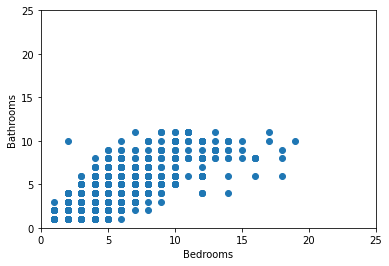

In [28]:
fig=plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(df_fe['Bedrooms'],df_fe['Bathrooms'])
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.xlim(0,25)
plt.ylim(0,25)

plt.show()

### Creating 2 new features to remove unusual values from SQFTmain feature by processing SQFT size per room and SQFT size per bathroom

In [29]:
df_fe['sqft/bedroom'] = df_fe['SQFTmain']/df_fe['Bedrooms']
df_fe['sqft/bathroom'] = df_fe['SQFTmain']/df_fe['Bathrooms']

In [30]:
df_fe.describe()

,AIN,TaxRateArea,totBuildingDataLines,YearBuilt,EffectiveYearBuilt,SQFTmain,Bedrooms,Bathrooms,Units,RecordingDate,TotalValue,AdministrativeRegion,Cluster,HouseNo,ZIPcode5,rowID,CENTER_LAT,CENTER_LON,sqft/bedroom,sqft/bathroom
count,9.586000e+03,9586.000000,9586.000000,9586.000000,9586.000000,9586.000000,9586.000000,9586.000000,9586.000000,9.586000e+03,9.586000e+03,9586.000000,9586.000000,9586.000000,9586.000000,9.586000e+03,9586.000000,9586.000000,9586.000000,9586.000000
mean,4.071938e+09,614.926560,1.082203,1949.406113,1954.499896,1912.115898,3.364073,2.455977,1.338827,2.008456e+07,5.404599e+05,6.140413,6378.690382,7021.575422,90634.697163,2.019407e+13,34.097446,-118.388257,581.037080,818.972379
std,1.590340e+09,2108.916846,0.315356,78.825317,96.745778,1246.216484,1.680270,1.423696,1.230608,9.499314e+04,7.710134e+05,3.962540,3988.838167,6103.432685,644.958617,1.590340e+09,0.124162,0.119099,214.848785,266.803926
min,2.004002e+09,4.000000,1.000000,0.000000,0.000000,400.000000,1.000000,1.000000,0.000000,1.948043e+07,0.000000e+00,2.000000,2102.000000,1.000000,90001.000000,2.019200e+13,33.708126,-118.667832,182.000000,251.857143
25%,2.424002e+09,13.000000,1.000000,1931.000000,1944.000000,1212.000000,2.000000,2.000000,1.000000,2.004041e+07,2.078800e+05,3.000000,3126.000000,1718.250000,90037.000000,2.019242e+13,34.016665,-118.467923,434.666667,640.000000
50%,4.264010e+09,16.000000,1.000000,1952.000000,1958.000000,1586.000000,3.000000,2.000000,1.000000,2.011112e+07,3.715685e+05,4.000000,4424.000000,5321.000000,90230.000000,2.019426e+13,34.098908,-118.385504,537.000000,776.500000
75%,5.422002e+09,67.000000,1.000000,1967.000000,1975.000000,2220.000000,4.000000,3.000000,1.000000,2.016022e+07,6.250015e+05,9.000000,9178.000000,10768.250000,91335.000000,2.019542e+13,34.197802,-118.295153,672.000000,945.500000
max,7.563036e+09,15938.000000,5.000000,2019.000000,2019.000000,53247.000000,19.000000,11.000000,54.000000,2.018123e+07,3.633071e+07,28.000000,28405.000000,28006.000000,91607.000000,2.019756e+13,34.329560,-118.127673,5324.700000,4840.636364


In [31]:
df_fe['sqft/bedroom'].quantile(0.99)

1321.2499999999993

In [32]:
df_fe['sqft/bathroom'].quantile(0.99)

1647.0249999999987

In [33]:
df_fe = df_fe[(df_fe['sqft/bedroom']<df_fe['sqft/bedroom'].quantile(0.99)) & (df_fe['sqft/bathroom']<df_fe['sqft/bathroom'].quantile(0.99))]

In [34]:
df_fe.shape

(9407, 32)

### Using the 99 percentile threshhold again to remove outliers

<Figure size 432x288 with 0 Axes>

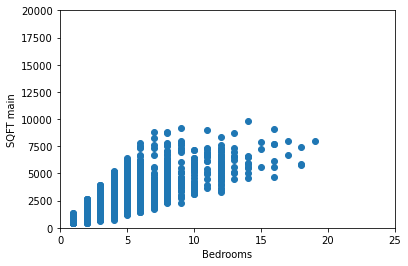

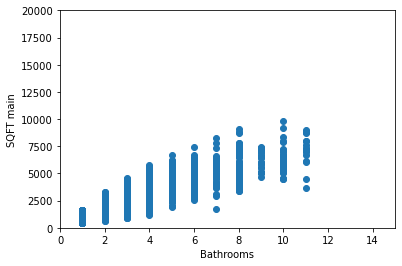

In [35]:
fig=plt.figure()

fig=plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.scatter(df_fe['Bedrooms'],df_fe['SQFTmain'])
plt.xlabel('Bedrooms')
plt.ylabel('SQFT main')
plt.xlim(0,25)
plt.ylim(0,20000)

fig=plt.figure()
ax3 = fig.add_subplot(1,1,1)
ax3.scatter(df_fe['Bathrooms'],df_fe['SQFTmain'])
plt.xlabel('Bathrooms')
plt.ylabel('SQFT main')
plt.xlim(0,15)
plt.ylim(0,20000)

plt.show()

### The new scatter plots show that outliers have been removed

In [36]:
df_fe['price/sqft'] = df_fe['TotalValue'] / df_fe['SQFTmain']

In [37]:
df_fe['price/sqft'].describe()

count    9407.000000
mean      276.477156
std       210.878301
min         0.000000
25%       140.314219
50%       226.714806
75%       361.093465
max      3170.530357
Name: price/sqft, dtype: float64

### 3 Standard deviation to remove outliers

In [38]:
df_fe['price/sqft'].quantile(0.99)

1039.9795193841733

In [39]:
df_fe['price/sqft'].quantile(0.01)

22.054416666666665

In [40]:
df_fe = df_fe[(df_fe['price/sqft']<df_fe['price/sqft'].quantile(0.99)) & (df_fe['price/sqft']>df_fe['price/sqft'].quantile(0.01))]

In [41]:
df_fe['price/sqft'].describe()

count    9217.000000
mean      268.782929
std       181.917680
min        22.312500
25%       142.209055
50%       226.714806
75%       356.665334
max      1036.108137
Name: price/sqft, dtype: float64

### More outliers removed. The data is much cleaner now.

In [42]:
df_fe = df_fe[df_fe['TotalValue']>0]

In [43]:
df_fe = df_fe[df_fe['YearBuilt']>0]

### An obvious constraint is the TotalValue and YearBuilt must be non-zero

In [44]:
df_fe.shape

(9207, 33)

### Add Census API dataset by linking 'ZIPcode'